<a href="https://colab.research.google.com/github/nceder/qpb4e/blob/main/code/Chapter%2022/Chapter_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22 Data over the network

In [12]:
import ftplib
ftp = ftplib.FTP('tgftp.nws.noaa.gov')
ftp.login()

'230 Login successful.'

In [13]:
ftp.cwd('data')

'250 CWD command successful'

In [14]:
ftp.nlst()

['zonecatalog.curr.tar',
 'climate',
 'forecasts',
 'hurricane_products',
 'marine',
 'observations',
 'products',
 'public_statement',
 'raw',
 'records',
 'summaries',
 'watches_warnings',
 'zonecatalog.curr',
 'national_products',
 'ls_SS_services',
 'nsd_cccc.txt',
 'rfc',
 'nsd_bbsss.txt',
 'tgftp_heartbeat',
 'mcf']

In [16]:
x = ftp.retrbinary('RETR observations/metar/decoded/KORD.TXT', open('KORD.TXT', 'wb').write)
open('KORD.TXT', 'r').readlines()

["CHICAGO O'HARE INTERNATIONAL, IL, United States (KORD) 41-59N 087-55W 200M\n",
 'Aug 20, 2025 - 09:42 AM EDT / 2025.08.20 1342 UTC\n',
 'Wind: from the NNE (020 degrees) at 13 MPH (11 KT):0\n',
 'Visibility: 10 mile(s):0\n',
 'Sky conditions: mostly cloudy\n',
 'Temperature: 72.0 F (22.2 C)\n',
 'Dew Point: 66.0 F (18.9 C)\n',
 'Relative Humidity: 81%\n',
 'Pressure (altimeter): 30.07 in. Hg (1018 hPa)\n',
 'ob: KORD 201342Z 02011KT 10SM BKN017 22/19 A3007 RMK AO2 T02220189\n',
 'cycle: 13\n']

## 22.1.3 Retrieving files over HTTP/HTTPS

In [29]:
import requests
response = requests.get("http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt")
print(response.text)

Heathrow (London Airport)
Location 507800E 176700N, Lat 51.479 Lon -0.449, 25m amsl
Estimated data is marked with a * after the value.
Missing data (more than 2 days missing in month) is marked by  ---.
Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.
   yyyy  mm   tmax    tmin      af    rain     sun
              degC    degC    days      mm   hours
   1948   1    8.9     3.3    ---     85.0    ---
   1948   2    7.9     2.2    ---     26.0    ---
   1948   3   14.2     3.8    ---     14.0    ---
   1948   4   15.4     5.1    ---     35.0    ---
   1948   5   18.1     6.9    ---     57.0    ---
   1948   6   19.1    10.3    ---     67.0    ---
   1948   7   21.7    12.0    ---     21.0    ---
   1948   8   20.8    11.7    ---     67.0    ---
   1948   9   19.6    10.2    ---     35.0    ---
   1948  10   14.9     6.0    ---     50.0    ---
   1948  11   10.8     4.6    ---     44.0    ---
   1948

### Try This: Retrieving A file
If you're working with the data file above and want to break each line into separate fields, how might you do that? What other processing would you expect to do? Try writing some code to retrieve this file and calculate the average annual rainfall or, for more of a challenge, the average maximum and minimum temperature for each year.


In [ ]:
# @title
import requests
response = requests.get("http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt")

data = response.text
data_rows = []
rainfall = []
for row in data.split("\r\n")[7:]: # Togliamo le prime righe descrivvie e separiamo le righe in base al comando nuova riga
    fields = [x for x in row.split(" ") if x] # Per ogni riga, divide i valori separandoli con spazio; filtra gli spazi vuoti per estrarre solo i dati numerici o testuali validi.
    data_rows.append(fields) # Aggiungiamo ogni riga con all'interno i valori per ogni campo alla variabile data_rows
    rainfall.append(float(fields[5])) # Registriamo ogni precipitazione convertendola in float

print("Average rainfall = {} mm".format(sum(rainfall)/len(rainfall)))


Average rainfall = 50.762835660580016 mm


#22.2 Fetching data via an API

In [50]:
response = requests.get("https://api.open-meteo.com/v1/forecast?latitude=41.882&longitude=-87.623&current=temperature_2m,wind_speed_10m")
weather = response.text
weather

'{"latitude":41.879482,"longitude":-87.64975,"generationtime_ms":0.03910064697265625,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":185.0,"current_units":{"time":"iso8601","interval":"seconds","temperature_2m":"°C","wind_speed_10m":"km/h"},"current":{"time":"2024-11-28T02:15","interval":900,"temperature_2m":1.0,"wind_speed_10m":9.2}}'

In [51]:
result = requests.get("https://data.cityofchicago.org/resource/6zsd-86xi.json?$where=date between '2024-01-10T12:01:00' and '2024-01-10T12:10:00'")
result.json()

[{'id': '13334404',
  'case_number': 'JH111115',
  'date': '2024-01-10T12:01:00.000',
  'block': '009XX W WINONA ST',
  'iucr': '2020',
  'primary_type': 'NARCOTICS',
  'description': 'POSSESS - AMPHETAMINES',
  'location_description': 'APARTMENT',
  'arrest': True,
  'domestic': False,
  'beat': '2024',
  'district': '020',
  'ward': '48',
  'community_area': '3',
  'fbi_code': '18',
  'x_coordinate': '1169132',
  'y_coordinate': '1934325',
  'year': '2024',
  'updated_on': '2024-01-18T15:41:44.000',
  'latitude': '41.975305734',
  'longitude': '-87.653416364',
  'location': {'type': 'Point', 'coordinates': [-87.653416364, 41.975305734]},
  'location_address': '',
  'location_city': '',
  'location_state': '',
  'location_zip': ''},
 {'id': '13334420',
  'case_number': 'JH111020',
  'date': '2024-01-10T12:01:00.000',
  'block': '009XX W WINONA ST',
  'iucr': '1330',
  'primary_type': 'CRIMINAL TRESPASS',
  'description': 'TO LAND',
  'location_description': 'APARTMENT',
  'arrest': Tr

In [52]:
result.url

"https://data.cityofchicago.org/resource/6zsd-86xi.json?$where=date%20between%20'2024-01-10T12:01:00'%20and%20'2024-01-10T12:10:00'"

### Try This: Accessing an API
Write some code to fetch some data from the city of Chicago website. Look at the fields mentioned in the results, and see whether you can select records based on another field in combination with the date range.

In [34]:
# @title
import requests
response = requests.get("https://data.cityofchicago.org/resource/6zsd-86xi.json?$where=date between '2015-01-10T12:00:00' and '2015-01-10T13:00:00'&arrest=true")

print(response.text)

[{"id":"9921038","case_number":"HY110050","date":"2015-01-10T12:00:00.000","block":"095XX S BENNETT AVE","iucr":"2820","primary_type":"OTHER OFFENSE","description":"TELEPHONE THREAT","location_description":"RESIDENCE","arrest":true,"domestic":true,"beat":"0431","district":"004","ward":"7","community_area":"51","fbi_code":"26","x_coordinate":"1190515","y_coordinate":"1842078","year":"2015","updated_on":"2018-02-10T15:50:01.000","latitude":"41.721683546","longitude":"-87.57776968","location":{"type":"Point","coordinates":[-87.57776968,41.721683546]},"location_address":"","location_city":"","location_state":"","location_zip":""}
,{"id":"9921110","case_number":"HY110086","date":"2015-01-10T12:12:00.000","block":"076XX S CICERO AVE","iucr":"0860","primary_type":"THEFT","description":"RETAIL THEFT","location_description":"DEPARTMENT STORE","arrest":true,"domestic":false,"beat":"0833","district":"008","ward":"13","community_area":"65","fbi_code":"06","x_coordinate":"1145727","y_coordinate":"1

22.3.1 JSON data

In [37]:
import json
import requests
response = requests.get("https://api.open-meteo.com/v1/forecast?latitude=41.882&longitude=-87.623&current=temperature_2m,wind_speed_10m")
weather = json.loads(response.text)
weather

{'latitude': 41.879482,
 'longitude': -87.64975,
 'generationtime_ms': 0.02586841583251953,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 185.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature_2m': '°C',
  'wind_speed_10m': 'km/h'},
 'current': {'time': '2025-08-20T14:30',
  'interval': 900,
  'temperature_2m': 21.7,
  'wind_speed_10m': 17.5}}

In [38]:
weather["current"]["temperature_2m"]

21.7

In [39]:
from pprint import pprint as pp
pp(weather)

{'current': {'interval': 900,
             'temperature_2m': 21.7,
             'time': '2025-08-20T14:30',
             'wind_speed_10m': 17.5},
 'current_units': {'interval': 'seconds',
                   'temperature_2m': '°C',
                   'time': 'iso8601',
                   'wind_speed_10m': 'km/h'},
 'elevation': 185.0,
 'generationtime_ms': 0.02586841583251953,
 'latitude': 41.879482,
 'longitude': -87.64975,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'utc_offset_seconds': 0}


In [40]:
import json
outfile = open("weather_01.json", "w")
json.dump(weather, outfile)
outfile.close()
json.dumps(weather)

'{"latitude": 41.879482, "longitude": -87.64975, "generationtime_ms": 0.02586841583251953, "utc_offset_seconds": 0, "timezone": "GMT", "timezone_abbreviation": "GMT", "elevation": 185.0, "current_units": {"time": "iso8601", "interval": "seconds", "temperature_2m": "\\u00b0C", "wind_speed_10m": "km/h"}, "current": {"time": "2025-08-20T14:30", "interval": 900, "temperature_2m": 21.7, "wind_speed_10m": 17.5}}'

In [41]:
print(json.dumps(weather, indent=2))

{
  "latitude": 41.879482,
  "longitude": -87.64975,
  "generationtime_ms": 0.02586841583251953,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 185.0,
  "current_units": {
    "time": "iso8601",
    "interval": "seconds",
    "temperature_2m": "\u00b0C",
    "wind_speed_10m": "km/h"
  },
  "current": {
    "time": "2025-08-20T14:30",
    "interval": 900,
    "temperature_2m": 21.7,
    "wind_speed_10m": 17.5
  }
}


In [43]:
weather_list = [weather]
response = requests.get("https://api.open-meteo.com/v1/forecast?latitude=38.624&longitude=-90.195&current=temperature_2m,wind_speed_10m")

weather_list.append(response.json())

weather_list

[{'latitude': 41.879482,
  'longitude': -87.64975,
  'generationtime_ms': 0.02586841583251953,
  'utc_offset_seconds': 0,
  'timezone': 'GMT',
  'timezone_abbreviation': 'GMT',
  'elevation': 185.0,
  'current_units': {'time': 'iso8601',
   'interval': 'seconds',
   'temperature_2m': '°C',
   'wind_speed_10m': 'km/h'},
  'current': {'time': '2025-08-20T14:30',
   'interval': 900,
   'temperature_2m': 21.7,
   'wind_speed_10m': 17.5}},
 {'latitude': 38.62057,
  'longitude': -90.17848,
  'generationtime_ms': 0.03063678741455078,
  'utc_offset_seconds': 0,
  'timezone': 'GMT',
  'timezone_abbreviation': 'GMT',
  'elevation': 137.0,
  'current_units': {'time': 'iso8601',
   'interval': 'seconds',
   'temperature_2m': '°C',
   'wind_speed_10m': 'km/h'},
  'current': {'time': '2025-08-20T14:30',
   'interval': 900,
   'temperature_2m': 25.9,
   'wind_speed_10m': 11.8}}]

In [44]:
outfile = open("weather_list.json", "w")
for report in weather_list:
    outfile.write(json.dumps(report) + "\n")
outfile.close()


In [45]:
print(open("weather_list.json", "r").read())

{"latitude": 41.879482, "longitude": -87.64975, "generationtime_ms": 0.02586841583251953, "utc_offset_seconds": 0, "timezone": "GMT", "timezone_abbreviation": "GMT", "elevation": 185.0, "current_units": {"time": "iso8601", "interval": "seconds", "temperature_2m": "\u00b0C", "wind_speed_10m": "km/h"}, "current": {"time": "2025-08-20T14:30", "interval": 900, "temperature_2m": 21.7, "wind_speed_10m": 17.5}}
{"latitude": 38.62057, "longitude": -90.17848, "generationtime_ms": 0.03063678741455078, "utc_offset_seconds": 0, "timezone": "GMT", "timezone_abbreviation": "GMT", "elevation": 137.0, "current_units": {"time": "iso8601", "interval": "seconds", "temperature_2m": "\u00b0C", "wind_speed_10m": "km/h"}, "current": {"time": "2025-08-20T14:30", "interval": 900, "temperature_2m": 25.9, "wind_speed_10m": 11.8}}



In [46]:
weather_list2 = []
for line in open("weather_list.json"):
    weather_list2.append(json.loads(line))
weather_list2

[{'latitude': 41.879482,
  'longitude': -87.64975,
  'generationtime_ms': 0.02586841583251953,
  'utc_offset_seconds': 0,
  'timezone': 'GMT',
  'timezone_abbreviation': 'GMT',
  'elevation': 185.0,
  'current_units': {'time': 'iso8601',
   'interval': 'seconds',
   'temperature_2m': '°C',
   'wind_speed_10m': 'km/h'},
  'current': {'time': '2025-08-20T14:30',
   'interval': 900,
   'temperature_2m': 21.7,
   'wind_speed_10m': 17.5}},
 {'latitude': 38.62057,
  'longitude': -90.17848,
  'generationtime_ms': 0.03063678741455078,
  'utc_offset_seconds': 0,
  'timezone': 'GMT',
  'timezone_abbreviation': 'GMT',
  'elevation': 137.0,
  'current_units': {'time': 'iso8601',
   'interval': 'seconds',
   'temperature_2m': '°C',
   'wind_speed_10m': 'km/h'},
  'current': {'time': '2025-08-20T14:30',
   'interval': 900,
   'temperature_2m': 25.9,
   'wind_speed_10m': 11.8}}]

In [18]:
outfile = open("weather_obj.json", "w")
weather_obj = {"reports": weather_list, "count": 2}
json.dump(weather_obj, outfile)
outfile.close()

In [19]:
with open("weather_obj.json") as infile:
    weather_obj = json.load(infile)
weather_obj

{'reports': [{'latitude': 41.879482,
   'longitude': -87.64975,
   'generationtime_ms': 0.01895427703857422,
   'utc_offset_seconds': 0,
   'timezone': 'GMT',
   'timezone_abbreviation': 'GMT',
   'elevation': 185.0,
   'current_units': {'time': 'iso8601',
    'interval': 'seconds',
    'temperature_2m': '°C',
    'wind_speed_10m': 'km/h'},
   'current': {'time': '2024-11-28T01:45',
    'interval': 900,
    'temperature_2m': 1.1,
    'wind_speed_10m': 8.7}},
  {'latitude': 38.62057,
   'longitude': -90.17848,
   'generationtime_ms': 0.20599365234375,
   'utc_offset_seconds': 0,
   'timezone': 'GMT',
   'timezone_abbreviation': 'GMT',
   'elevation': 137.0,
   'current_units': {'time': 'iso8601',
    'interval': 'seconds',
    'temperature_2m': '°C',
    'wind_speed_10m': 'km/h'},
   'current': {'time': '2024-11-28T01:45',
    'interval': 900,
    'temperature_2m': 4.6,
    'wind_speed_10m': 11.3}}],
 'count': 2}

### Try this: Saving some JSON crime data
Modify the code you wrote in section 22.2 to fetch the Chicago crime data. Then convert the fetched data from a JSON-formatted string to a Python object. Next, see whether you can save the crime events as a series of separate JSON strings in one file and as one JSON object in another file. Then see what code is needed to load each file.

In [49]:
# @title
import json
import requests

response = requests.get("https://data.cityofchicago.org/resource/6zsd-86xi.json?$where=date between '2015-01-10T12:00:00' and '2015-01-10T13:00:00'&arrest=true")

crime_data = json.loads(response.text) # La risposta è convertita in una lista di dizionari Python (ogni dizionario è un record di un crimine).

with open("crime_all.json", "w") as outfile: # Scrive TUTTI i dati in un unico file JSON (crime_all.json) come un’unica lista contentente vari dict.
    json.dump(crime_data, outfile)

with open("crime_series.json", "w") as outfile: # Scrive i dati in un altro file (crime_series.json), ma stavolta scrive ogni singolo record JSON su una riga separata.
    for record in crime_data:
        json.dump(record, outfile)
        outfile.write("\n")

with open("crime_all.json") as infile: # Ricarica i dati dal file JSON scritto come lista completa.
    crime_data_2 = json.load(infile)

print(crime_data_2)

crime_data_3 = []
with open("crime_series.json") as infile: # Questa parte di codice serve a leggere un file in cui ogni riga è un oggetto JSON separato e a trasformare ogni riga in un oggetto Python, per poi metterli tutti in una lista.
    for line in infile:
        crime_data_3.append(json.loads(line))

print(crime_data_3)

[{'id': '9921038', 'case_number': 'HY110050', 'date': '2015-01-10T12:00:00.000', 'block': '095XX S BENNETT AVE', 'iucr': '2820', 'primary_type': 'OTHER OFFENSE', 'description': 'TELEPHONE THREAT', 'location_description': 'RESIDENCE', 'arrest': True, 'domestic': True, 'beat': '0431', 'district': '004', 'ward': '7', 'community_area': '51', 'fbi_code': '26', 'x_coordinate': '1190515', 'y_coordinate': '1842078', 'year': '2015', 'updated_on': '2018-02-10T15:50:01.000', 'latitude': '41.721683546', 'longitude': '-87.57776968', 'location': {'type': 'Point', 'coordinates': [-87.57776968, 41.721683546]}, 'location_address': '', 'location_city': '', 'location_state': '', 'location_zip': ''}, {'id': '9921110', 'case_number': 'HY110086', 'date': '2015-01-10T12:12:00.000', 'block': '076XX S CICERO AVE', 'iucr': '0860', 'primary_type': 'THEFT', 'description': 'RETAIL THEFT', 'location_description': 'DEPARTMENT STORE', 'arrest': True, 'domestic': False, 'beat': '0833', 'district': '008', 'ward': '13',

## 22.3.2 XML data

In [22]:
result = requests.get("https://api.worldbank.org/v2/country/CL/indicator/SP.POP.TOTL?format=xml")
pop_data = result.text[3:]
print(pop_data)

<?xml version="1.0" encoding="utf-8"?>
<wb:data page="1" pages="2" per_page="50" total="64" sourceid="2" lastupdated="2024-11-13" xmlns:wb="http://www.worldbank.org">
  <wb:data>
    <wb:indicator id="SP.POP.TOTL">Population, total</wb:indicator>
    <wb:country id="CL">Chile</wb:country>
    <wb:countryiso3code>CHL</wb:countryiso3code>
    <wb:date>2023</wb:date>
    <wb:value>19629590</wb:value>
    <wb:unit />
    <wb:obs_status />
    <wb:decimal>0</wb:decimal>
  </wb:data>
  <wb:data>
    <wb:indicator id="SP.POP.TOTL">Population, total</wb:indicator>
    <wb:country id="CL">Chile</wb:country>
    <wb:countryiso3code>CHL</wb:countryiso3code>
    <wb:date>2022</wb:date>
    <wb:value>19603733</wb:value>
    <wb:unit />
    <wb:obs_status />
    <wb:decimal>0</wb:decimal>
  </wb:data>
  <wb:data>
    <wb:indicator id="SP.POP.TOTL">Population, total</wb:indicator>
    <wb:country id="CL">Chile</wb:country>
    <wb:countryiso3code>CHL</wb:countryiso3code>
    <wb:date>2021</wb:date>
 

In [23]:
! pip install xmltodict

In [25]:
import xmltodict
population = xmltodict.parse(pop_data)
population

{'wb:data': {'@page': '1',
  '@pages': '2',
  '@per_page': '50',
  '@total': '64',
  '@sourceid': '2',
  '@lastupdated': '2024-11-13',
  '@xmlns:wb': 'http://www.worldbank.org',
  'wb:data': [{'wb:indicator': {'@id': 'SP.POP.TOTL',
     '#text': 'Population, total'},
    'wb:country': {'@id': 'CL', '#text': 'Chile'},
    'wb:countryiso3code': 'CHL',
    'wb:date': '2023',
    'wb:value': '19629590',
    'wb:unit': None,
    'wb:obs_status': None,
    'wb:decimal': '0'},
   {'wb:indicator': {'@id': 'SP.POP.TOTL', '#text': 'Population, total'},
    'wb:country': {'@id': 'CL', '#text': 'Chile'},
    'wb:countryiso3code': 'CHL',
    'wb:date': '2022',
    'wb:value': '19603733',
    'wb:unit': None,
    'wb:obs_status': None,
    'wb:decimal': '0'},
   {'wb:indicator': {'@id': 'SP.POP.TOTL', '#text': 'Population, total'},
    'wb:country': {'@id': 'CL', '#text': 'Chile'},
    'wb:countryiso3code': 'CHL',
    'wb:date': '2021',
    'wb:value': '19493184',
    'wb:unit': None,
    'wb:obs_st

### Try This: Fetching and Parsing XML
Write the code to pull the XML data for Chile’s population from http://mng.bz/103V. Then use `xmltodict` to parse the XML into a Python dictionary and report how much Chile's population changed in the past 25 years.

In [51]:
# @title
import requests
import xmltodict

result = requests.get("https://api.worldbank.org/v2/country/CL/indicator/SP.POP.TOTL?format=xml")
pop_data = result.text[3:]
population = xmltodict.parse(pop_data)
start_population = population['wb:data']['wb:data'][25]
current_population = population['wb:data']['wb:data'][0]
print(f"Popluation change from {start_population['wb:date']} to {current_population['wb:date']}: {int(current_population['wb:value']) - int(start_population['wb:value'])}")



Popluation change from 1999 to 2024: 4445458


# 22.4 Scraping web data

In [35]:
%%writefile test.html
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML//EN">
<html> <head>
<title>Title</title>
</head>

<body>
<h1>Heading 1</h1>

This is plan text, and is boring
<span class="special">this is special</span>

Here is a <a href="http://bitbucket.dev.null">link</a>

<hr>
<address>Ann Address, Somewhere, AState 00000
</address>
</body> </html>

Writing test.html


In [36]:
import bs4
html = open("test.html").read()
bs = bs4.BeautifulSoup(html, "html.parser")

In [37]:
a_list = bs("a")
print(a_list)

[<a href="http://bitbucket.dev.null">link</a>]


In [38]:
a_item = a_list[0]
a_item.text

'link'

In [39]:
a_item["href"]

'http://bitbucket.dev.null'

In [40]:
special_list = bs.select(".special")
print(special_list)

[<span class="special">this is special</span>]


In [41]:
special_item = special_list[0]
special_item.text

'this is special'

In [42]:
special_item["class"]

['special']

### Try This: Parsing HTML
Given the file `forecast.html` (which you can create by executing the cell below), write a script using Beautiful Soup that extracts the data and saves it as a CSV file, shown here.

In [53]:
%%writefile forecast.html
<html>
  <body>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Tonight</b></div>
        <div class="grid col-75 forecast-text">A slight chance of showers and thunderstorms before 10pm. Mostly cloudy, with a low around 66. West southwest wind around 9 mph. Chance of precipitation is 20%. New rainfall amounts between a tenth and quarter of an inch possible.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Friday</b></div>
        <div class="grid col-75 forecast-text">Partly sunny. High near 77, with temperatures falling to around 75 in the afternoon. Northwest wind 7 to 12 mph, with gusts as high as 18 mph.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Friday Night</b></div>
        <div class="grid col-75 forecast-text">Mostly cloudy, with a low around 63. North wind 7 to 10 mph.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Saturday</b></div>
        <div class="grid col-75 forecast-text">Mostly sunny, with a high near 73. North wind around 10 mph.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Saturday Night</b></div>
        <div class="grid col-75 forecast-text">Partly cloudy, with a low around 63. North wind 5 to 10 mph.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Sunday</b></div>
        <div class="grid col-75 forecast-text">Mostly sunny, with a high near 73.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Sunday Night</b></div>
        <div class="grid col-75 forecast-text">Mostly cloudy, with a low around 64.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Monday</b></div>
        <div class="grid col-75 forecast-text">Mostly sunny, with a high near 74.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Monday Night</b></div>
        <div class="grid col-75 forecast-text">Mostly clear, with a low around 65.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Tuesday</b></div>
        <div class="grid col-75 forecast-text">Sunny, with a high near 75.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Tuesday Night</b></div>
        <div class="grid col-75 forecast-text">Mostly clear, with a low around 65.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Wednesday</b></div>
        <div class="grid col-75 forecast-text">Sunny, with a high near 77.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Wednesday Night</b></div>
        <div class="grid col-75 forecast-text">Mostly clear, with a low around 67.</div>
    </div>
    <div class="row row-forecast">
        <div class="grid col-25 forecast-label"><b>Thursday</b></div>
        <div class="grid col-75 forecast-text">A chance of rain showers after 1pm. Mostly sunny, with a high near 81. Chance of precipitation is 30%.</div>
    </div>
  </body>
</html>

Writing forecast.html


In [55]:
# @title
import csv
import bs4

def read_html(filename):
    with open(filename) as html_file:
        html = html_file.read()
        return html


def parse_html(html):
    bs = bs4.BeautifulSoup(html, "html.parser")
    labels = [x.text for x in bs.select(".forecast-label")]
    forecasts = [x.text for x in bs.select(".forecast-text")]

    return list(zip(labels, forecasts))

def write_to_csv(data, outfilename):
    csv.writer(open(outfilename, "w")).writerows(data)

if __name__ == '__main__':
    html = read_html("forecast.html")
    values = parse_html(html)
    write_to_csv(values, "forecast.csv")
    print(values)

[('Tonight', 'A slight chance of showers and thunderstorms before 10pm. Mostly cloudy, with a low around 66. West southwest wind around 9 mph. Chance of precipitation is 20%. New rainfall amounts between a tenth and quarter of an inch possible.'), ('Friday', 'Partly sunny. High near 77, with temperatures falling to around 75 in the afternoon. Northwest wind 7 to 12 mph, with gusts as high as 18 mph.'), ('Friday Night', 'Mostly cloudy, with a low around 63. North wind 7 to 10 mph.'), ('Saturday', 'Mostly sunny, with a high near 73. North wind around 10 mph.'), ('Saturday Night', 'Partly cloudy, with a low around 63. North wind 5 to 10 mph.'), ('Sunday', 'Mostly sunny, with a high near 73.'), ('Sunday Night', 'Mostly cloudy, with a low around 64.'), ('Monday', 'Mostly sunny, with a high near 74.'), ('Monday Night', 'Mostly clear, with a low around 65.'), ('Tuesday', 'Sunny, with a high near 75.'), ('Tuesday Night', 'Mostly clear, with a low around 65.'), ('Wednesday', 'Sunny, with a high

# Lab 22.5  Track the weather

Use the API described in section 22.2 to gather a history of the mean temperatures of a location (you can use Chicago as above or supply the latitude and longitude for a different location) for a month. You will need to use a slightly different URL for the archive API: `https://archive-api.open-meteo.com/v1/era5?latitude=<latitude>&longitude=<longitude>&start_date=<YYYY-MM-DD>&end_date=<YYYY-MM-DD>&daily=temperature_2m_mean` like this:

```python
https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean
```
Notice that you will get two lists - a list of the dates and a matching list o f the mean temperatures in Celsius for those dates. Transform the data so that you can load it into a spreadsheet and graph it.  

**HINT:** Remember that spreadsheets can read CSV files, so you don't need to create an Excel file.

## Human solution

In [ ]:
import requests
import csv
response = requests.get("https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean")
weather_history = response.json()
weather_history


{'latitude': 41.862915,
 'longitude': -87.64877,
 'generationtime_ms': 0.04601478576660156,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 186.0,
 'daily_units': {'time': 'iso8601', 'temperature_2m_mean': '°C'},
 'daily': {'time': ['2024-07-01',
   '2024-07-02',
   '2024-07-03',
   '2024-07-04',
   '2024-07-05',
   '2024-07-06',
   '2024-07-07',
   '2024-07-08',
   '2024-07-09',
   '2024-07-10',
   '2024-07-11',
   '2024-07-12',
   '2024-07-13',
   '2024-07-14',
   '2024-07-15',
   '2024-07-16',
   '2024-07-17',
   '2024-07-18',
   '2024-07-19',
   '2024-07-20',
   '2024-07-21',
   '2024-07-22',
   '2024-07-23',
   '2024-07-24',
   '2024-07-25',
   '2024-07-26',
   '2024-07-27',
   '2024-07-28',
   '2024-07-29',
   '2024-07-30',
   '2024-07-31'],
  'temperature_2m_mean': [16.8,
   21.2,
   25.7,
   24.0,
   23.2,
   21.0,
   22.8,
   24.8,
   22.8,
   21.4,
   20.7,
   21.6,
   23.9,
   25.9,
   25.9,
   25.3,
   22.7,
   19.2,
   19.3,
   

In [ ]:

weather_data = zip(weather_history["daily"]["time"], weather_history["daily"]["temperature_2m_mean"])
list(weather_data)


[('2024-07-01', 16.8),
 ('2024-07-02', 21.2),
 ('2024-07-03', 25.7),
 ('2024-07-04', 24.0),
 ('2024-07-05', 23.2),
 ('2024-07-06', 21.0),
 ('2024-07-07', 22.8),
 ('2024-07-08', 24.8),
 ('2024-07-09', 22.8),
 ('2024-07-10', 21.4),
 ('2024-07-11', 20.7),
 ('2024-07-12', 21.6),
 ('2024-07-13', 23.9),
 ('2024-07-14', 25.9),
 ('2024-07-15', 25.9),
 ('2024-07-16', 25.3),
 ('2024-07-17', 22.7),
 ('2024-07-18', 19.2),
 ('2024-07-19', 19.3),
 ('2024-07-20', 20.8),
 ('2024-07-21', 21.6),
 ('2024-07-22', 21.8),
 ('2024-07-23', 23.0),
 ('2024-07-24', 21.2),
 ('2024-07-25', 20.3),
 ('2024-07-26', 20.5),
 ('2024-07-27', 22.6),
 ('2024-07-28', 23.4),
 ('2024-07-29', 23.8),
 ('2024-07-30', 24.6),
 ('2024-07-31', 26.2)]

In [ ]:
with open("weather_history.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Temperature"])
    writer.writerows(weather_data)



### Remaining steps

1. Download weather_history.csv to your machine.
2. Import weather_history.cvs into a spreadsheet (e.g. Google sheets or Excel)
3. Select data and insert chart. (creating a graph may be somewhat different in different applications.)

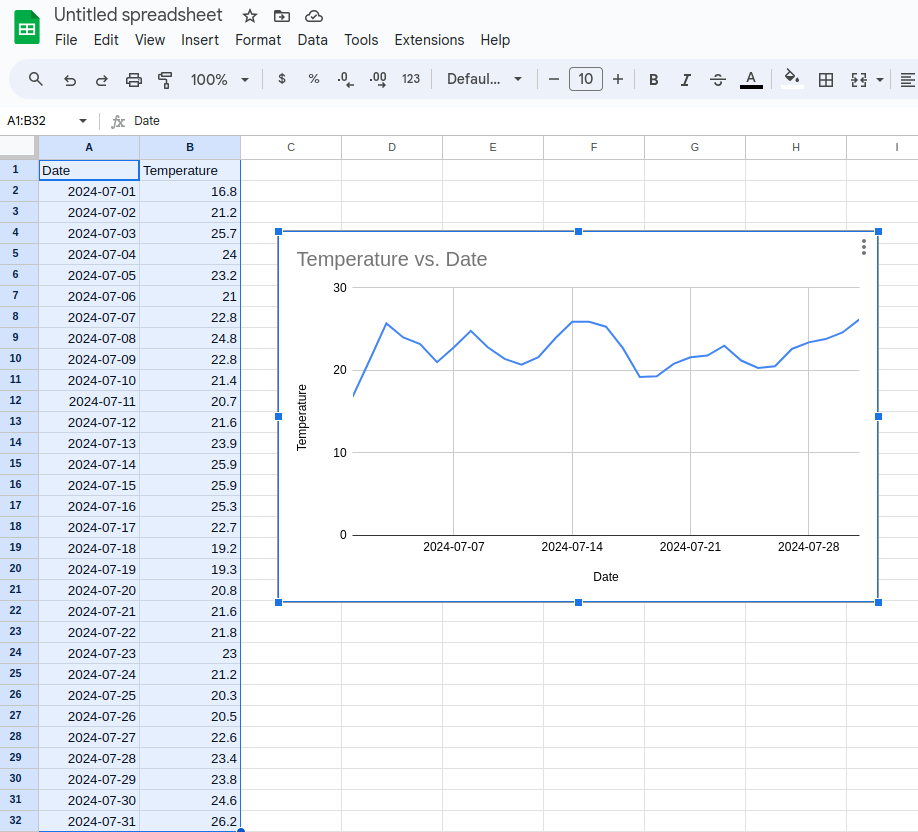

## Copilot solution

### Prompt

The URL https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean will return one day’s weather data for Chicago in JSON format. The data will contain a “daily” field with two lists, “time” and “temperature_2m_mean”. Download the data and save the time and temperature_2m_mean fields into a CSV file that can later be loaded into a spreadsheet and graphed.


In [ ]:
import requests
import csv

# URL to fetch the weather data
url = "https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean"

# Fetch the data
response = requests.get(url)
data = response.json()

# Extract the relevant fields
time_data = data['daily']['time']
temperature_data = data['daily']['temperature_2m_mean']

# Output CSV file
output_file = 'Chicago_weather_July_2024.csv'

# Write the data to the CSV file
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Temperature (°C)'])  # Write the header
    for time, temperature in zip(time_data, temperature_data):
        writer.writerow([time, temperature])

## Colaboratory solution

### Prompt

The URL https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean will return one day’s weather data for Chicago in JSON format. The data will contain a “daily” field with two lists, “time” and “temperature_2m_mean”. Download the data and save the time and temperature_2m_mean fields into a CSV file that can later be loaded into a spreadsheet and graphed.


In [ ]:
# prompt: The URL https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean
#         will return one day’s weather data for Chicago in JSON format. The
#         data will contain a “daily” field with two lists, “time” and
#         “temperature_2m_mean”. Download the data and save the time and
#         temperature_2m_mean fields into a CSV file that can later be loaded
#         into a spreadsheet and graphed.

import csv
import requests

def download_and_save_chicago_weather():
  """Downloads Chicago weather data and saves it to a CSV file."""

  url = "https://archive-api.open-meteo.com/v1/era5?latitude=41.879&longitude=-87.64975&start_date=2024-07-01&end_date=2024-07-31&daily=temperature_2m_mean"
  response = requests.get(url)
  if response.status_code == 200:
    weather_data = response.json()

    if "daily" in weather_data:
      daily_data = weather_data["daily"]
      if "time" in daily_data and "temperature_2m_mean" in daily_data:
        with open('chicago_weather_july.csv', 'w', newline='') as outfile:
          writer = csv.writer(outfile)
          writer.writerow(['Date', 'Mean Temperature (°C)'])  # Write header row
          for i in range(len(daily_data["time"])):
            writer.writerow([daily_data["time"][i], daily_data["temperature_2m_mean"][i]])
        print("Chicago weather data for July 2024 saved to chicago_weather_july.csv")
      else:
        print("Error: 'time' or 'temperature_2m_mean' not found in daily data.")
    else:
      print("Error: 'daily' field not found in weather data.")
  else:
    print("Error downloading data:", response.status_code)


download_and_save_chicago_weather()

Chicago weather data for July 2024 saved to chicago_weather_july.csv
